# <center><h1>Group 12 Final Project: Credit Card Fraud Detection Using Deep Learning<br>
Olin Business School<h1>

Alan Li (Leader), Yuki Ao, Cassie Zhang, Christy Ren, Rita Shi

![](
https://drive.google.com/uc?export=view&id=1T7KY3RE26VV95QFVKZONPbE-pmF__5dH)

## **Introduction**

Credit card fraud is very common. According to a survey, more than 270,000 cases of credit card fraud occurred in 2019 alone. In this report, we designed a deep learning model to mimic the process of fraud transaction detection. This will help the credit card companies build up their prestige, and improve the overall efficiency of online transactions. <br>
Here is the structure of the report: <br>

1. Read, cleaned data & Made data exploratory analysis<br>
2. Used SMOTE to oversample<br>
3. Built a baseline network model using Keras<br>
4. Tried different combinations of hyperparameters and optimizers to got the best model. <br>
5. Conclusion: <br>
a. Reach an accuracy of 99.85%<br>
b. Lower the fraud transaction risk by 80%.



## **Problem description** <br>
The two main problems we are facing are:<br>
1. How to overcome the problem of the **imbalance** in an efficient way. <br>
Severe skew. 99.833% normal transactions and 0.167% fraud transactions. <br>
Low predictive accuracy for the infrequent class. **Oversampling** will solve the problem. 

2. How to find the best **hyperparameters** to reach the best prediction result. <br> 
There are so many combinations. <br>
An **asymptotic** approach: tune one parameter first to get the optimal value, fix it, and move on to the next one. 

## **Review of the literature**
To solve the problem of learning from imbalanced data, we researched a few related papers and projects.

Based on the research we mentioned in the report, we tried SMOTE to oversample the imbalanced class, compared results by tuning different hyperparameters and chose the best model with the highest prediction accuracy on fraud class.


In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
path = "/content/drive/My Drive/"

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math
import seaborn as sns
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [ ]:
import pandas as pd
# Load data and remove the header 
data=pd.read_csv("/content/drive/MyDrive/FL2020/Deep Learning/Final Project/creditcard.csv")

In [ ]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Read Data

In [ ]:
X = data.iloc[: , 1:30].values
y = data.iloc[:, 30].values

## Exploratory Data Analysis

In [ ]:
data.shape

(284807, 31)

In [ ]:
# Check Duplicates
normal_duplicates = sum( data.loc[ data.Class==0 ].duplicated() )
fraud_duplicates = sum( data.loc[ data.Class==1 ].duplicated() )
total_duplicates = normal_duplicates + fraud_duplicates

print( 'Normal duplicates', normal_duplicates )
print( 'Fraud duplicates', fraud_duplicates )
print( 'Total duplicates', total_duplicates )
print( f"There are {100*total_duplicates / len(data):.2f}% deplicated transactions." )

Normal duplicates 1062
Fraud duplicates 19
Total duplicates 1081
There are 0.38% deplicated transactions.


In [ ]:
# Remove the duplicated transactions
data = data.drop_duplicates()
data.shape

(283726, 31)

In [ ]:
#Read data without duplicates
X = data.iloc[: , 1:30].values
y = data.iloc[:, 30].values

In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,-0.001441,0.000202,-0.000715,0.000603,0.000252,0.001043,0.001162,0.000170,0.001515,-0.000264,0.000187,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,1.076407,1.018720,0.994674,0.995430,0.952215,0.914894,0.873696,0.842507,0.837378,0.813379,0.769984,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.797473,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,-0.535578,-0.761649,-0.406198,-0.647862,-0.425732,-0.581452,-0.466860,-0.483928,-0.498014,-0.456289,-0.211469,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,-0.093237,-0.032306,0.139072,-0.012927,0.050209,0.049299,0.067119,-0.065867,-0.002142,0.003367,-0.062353,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,0.453619,0.739579,0.616976,0.663178,0.492336,0.650104,0.523512,0.398972,0.501956,0.458508,0.133207,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,12.018913,7.848392,7.126883,10.526766,8.877742,17.315112,9.253526,5.041069,5.591971,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [ ]:
data['Class'].value_counts()
# data.groupby('Class')['Class'].count()

Class
0    283253
1       473
Name: Class, dtype: int64

In [ ]:
c_0 = sum(data.Class==0)/data.shape[0]
c_1 = sum(data.Class==1)/data.shape[0]

print(f"There are {c_0*100:.3f}% normal tractions and {c_1*100:.3f}% fraud transactions.") 

There are 99.833% normal tractions and 0.167% fraud transactions.


In [ ]:
# Convert time to time of day, in hours
data['Time'] = ( data['Time'].values / 3600 ) % 24

Text(0.5, 1.0, 'Fraud Transaction')

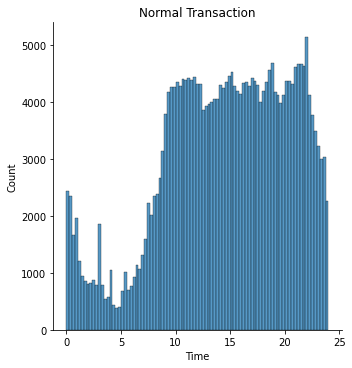

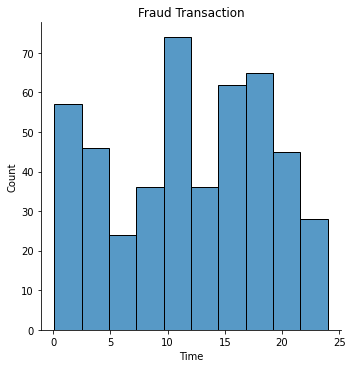

In [ ]:
sns.displot(data.loc[data['Class']==0],x="Time")
plt.title("Normal Transaction")
sns.displot(data.loc[data['Class']==1], x="Time")
plt.title("Fraud Transaction")


**Normal transactions (non-fraud) usually happen from 8am to midnight. Fraud transactions happen at 2-3am，noon and 3-7pm.**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


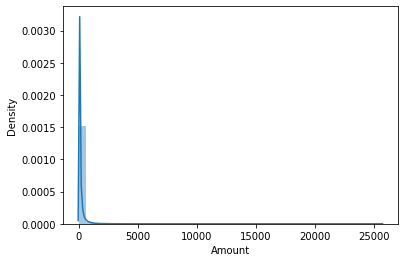

In [ ]:
sns.distplot(data['Amount'], bins=40)

In [ ]:
temp0 = data.loc[data['Class']==0]
temp1 = data.loc[data['Class']==1]
print(temp0['Amount'].mean())
print(temp1['Amount'].mean())

88.41357475466688
123.87186046511626


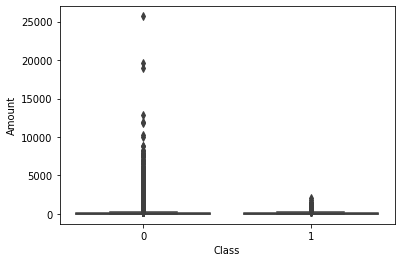

In [ ]:
sns.boxplot(x="Class", y="Amount", data=data)

Text(0.5, 1.0, 'Fraud Transaction Value')

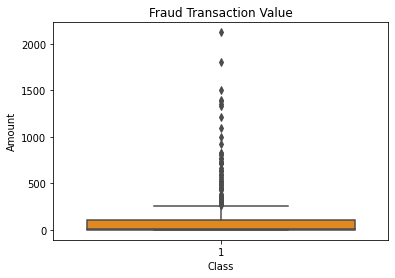

In [ ]:
sns.boxplot(x="Class", y="Amount", data=temp1,color = 'darkorange') #temp1.loc[temp1['Amount']<500]
plt.title("Fraud Transaction Value")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Fraud Transaction Value Distribution')

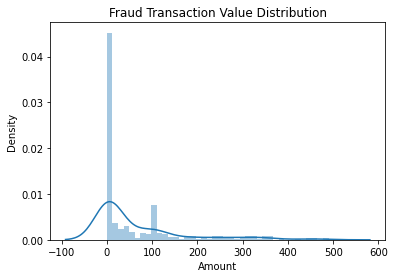

In [ ]:
sns.distplot(temp1.loc[temp1['Amount']<500]['Amount'], bins=40)
plt.title("Fraud Transaction Value Distribution")

Text(0.5, 1.0, 'Average Transaction')

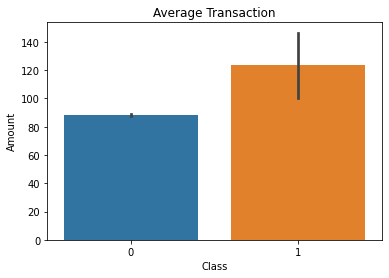

In [ ]:
from numpy import mean
sns.barplot(x="Class", y="Amount", data=data, estimator=mean)
plt.title("Average Transaction")

**Fraud transactions have an average value of $123.87, 40.1% higher than that of normal transactions.**

## Preprocess: Standardize

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Train-Validation-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split

# Train-test-validation split
X_train,X_tmp,y_train,y_tmp=train_test_split(X,y,test_size=0.1,stratify=data.Class)
X_validation,X_test,y_validation,y_test=train_test_split(X_tmp,y_tmp,test_size=0.5)
print(X_train.shape,X_validation.shape,X_test.shape)

(256326, 29) (14240, 29) (14241, 29)


## Oversampling the training dataset to solve imbalance  problem

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
sum(y_train==0)/len(y_train)

0.5

In [ ]:
sum(y_train==1)/len(y_train)

0.5

In [ ]:
#New data shape
print(X_train.shape,X_validation.shape,X_test.shape)

(509854, 29) (14186, 29) (14187, 29)


In [ ]:
#Fraud rate in validation data
sum(y_validation==1)/len(y_validation)

0.0016213167912025941

In [ ]:
#Fraud rate in test data
sum(y_test==1)/len(y_test)

0.0016916895749629942

## Model Building

### Model 1: 4 layers (baseline)

In [ ]:
# Model 1 (base model)
from keras.layers import Dropout
from keras import models,layers
from keras.callbacks import EarlyStopping

# Define the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping

model_hist=model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/20
5118/5118 [==============================] - 9s 2ms/step - loss: 0.1215 - accuracy: 0.9682 - val_loss: 0.1004 - val_accuracy: 0.9637
Epoch 2/20
5118/5118 [==============================] - 9s 2ms/step - loss: 0.0249 - accuracy: 0.9934 - val_loss: 0.0083 - val_accuracy: 0.9981
Epoch 3/20
5118/5118 [==============================] - 10s 2ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0124 - val_accuracy: 0.9963
Epoch 4/20
5118/5118 [==============================] - 9s 2ms/step - loss: 0.0090 - accuracy: 0.9974 - val_loss: 0.0049 - val_accuracy: 0.9984
Epoch 5/20
5118/5118 [==============================] - 9s 2ms/step - loss: 0.0072 - accuracy: 0.9979 - val_loss: 0.0089 - val_accuracy: 0.9963
Epoch 6/20
5118/5118 [==============================] - 9s 2ms/step - loss: 0.0062 - accuracy: 0.9982 - val_loss: 0.0062 - val_accuracy: 0.9980
Epoch 7/20
5118/5118 [==============================] - 9s 2ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0059 - val_accuracy

<function matplotlib.pyplot.imshow>

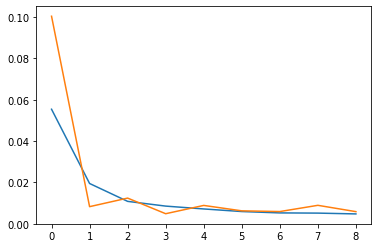

In [ ]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

### Model 2： 5 layers (best and final model)

In [ ]:
from keras.layers import Dropout
from keras import models,layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=100,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
5118/5118 [==============================] - 12s 2ms/step - loss: 0.1116 - accuracy: 0.9679 - val_loss: 0.0073 - val_accuracy: 0.9985
Epoch 2/50
5118/5118 [==============================] - 11s 2ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.0108 - val_accuracy: 0.9969
Epoch 3/50
5118/5118 [==============================] - 11s 2ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 0.0071 - val_accuracy: 0.9978
Epoch 4/50
5118/5118 [==============================] - 11s 2ms/step - loss: 0.0107 - accuracy: 0.9966 - val_loss: 0.0044 - val_accuracy: 0.9987
Epoch 5/50
5118/5118 [==============================] - 11s 2ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0061 - val_accuracy: 0.9987
Epoch 6/50
5118/5118 [==============================] - 11s 2ms/step - loss: 0.0064 - accuracy: 0.9981 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 7/50
5118/5118 [==============================] - 11s 2ms/step - loss: 0.0071 - accuracy: 0.9979 - val_loss: 0.0054 - val_ac

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14211
       fraud       0.76      0.87      0.81        30

    accuracy                           1.00     14241
   macro avg       0.88      0.93      0.91     14241
weighted avg       1.00      1.00      1.00     14241



<function matplotlib.pyplot.imshow>

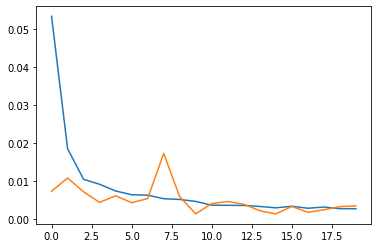

In [ ]:
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

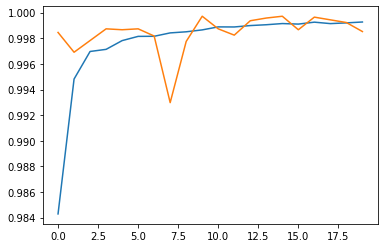

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

### Model 3： 6 layers (too complicated)

In [ ]:
from keras.layers import Dropout
from keras import models,layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=100,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
5118/5118 [==============================] - 17s 3ms/step - loss: 0.0993 - accuracy: 0.9670 - val_loss: 0.0165 - val_accuracy: 0.9961
Epoch 2/50
5118/5118 [==============================] - 16s 3ms/step - loss: 0.0213 - accuracy: 0.9934 - val_loss: 0.0119 - val_accuracy: 0.9973
Epoch 3/50
5118/5118 [==============================] - 16s 3ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0101 - val_accuracy: 0.9972
Epoch 4/50
5118/5118 [==============================] - 16s 3ms/step - loss: 0.0111 - accuracy: 0.9967 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 5/50
5118/5118 [==============================] - 16s 3ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.0048 - val_accuracy: 0.9985
Epoch 6/50
5118/5118 [==============================] - 16s 3ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0058 - val_accuracy: 0.9982
Epoch 7/50
5118/5118 [==============================] - 16s 3ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.0136 - val_ac

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14211
       fraud       0.49      0.90      0.64        30

    accuracy                           1.00     14241
   macro avg       0.75      0.95      0.82     14241
weighted avg       1.00      1.00      1.00     14241



<function matplotlib.pyplot.imshow>

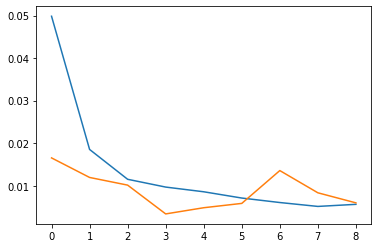

In [ ]:
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

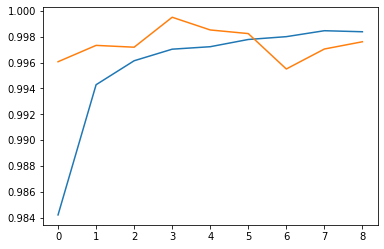

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

### Model 4： 5 layers with dropout

In [ ]:
from keras.layers import Dropout
from keras import models,layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=100,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])


Epoch 1/50
5118/5118 [==============================] - 14s 3ms/step - loss: 0.1488 - accuracy: 0.9471 - val_loss: 0.0062 - val_accuracy: 0.9994
Epoch 2/50
5118/5118 [==============================] - 13s 3ms/step - loss: 0.0256 - accuracy: 0.9905 - val_loss: 0.0338 - val_accuracy: 0.9933
Epoch 3/50
5118/5118 [==============================] - 14s 3ms/step - loss: 0.0181 - accuracy: 0.9938 - val_loss: 0.0099 - val_accuracy: 0.9966
Epoch 4/50
5118/5118 [==============================] - 15s 3ms/step - loss: 0.0137 - accuracy: 0.9953 - val_loss: 0.0061 - val_accuracy: 0.9983
Epoch 5/50
5118/5118 [==============================] - 14s 3ms/step - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0065 - val_accuracy: 0.9975
Epoch 6/50
5118/5118 [==============================] - 14s 3ms/step - loss: 0.0101 - accuracy: 0.9968 - val_loss: 0.0063 - val_accuracy: 0.9977
Epoch 7/50
5118/5118 [==============================] - 14s 3ms/step - loss: 0.0096 - accuracy: 0.9970 - val_loss: 0.0038 - val_ac

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14211
       fraud       0.64      0.93      0.76        30

    accuracy                           1.00     14241
   macro avg       0.82      0.97      0.88     14241
weighted avg       1.00      1.00      1.00     14241



**f1-score for predicting 'fraud' is 0.76, which is worse than without dropout**

### Model 5： 5 layers with L2 Weight Regularization

In [ ]:
from keras.regularizers import l2
from keras.layers import Dropout
from keras import models,layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer="l2"))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping

model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=100,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
5118/5118 [==============================] - 10s 2ms/step - loss: 0.2476 - accuracy: 0.9452 - val_loss: 0.0352 - val_accuracy: 0.9973
Epoch 2/50
5118/5118 [==============================] - 10s 2ms/step - loss: 0.0741 - accuracy: 0.9811 - val_loss: 0.0550 - val_accuracy: 0.9945
Epoch 3/50
5118/5118 [==============================] - 9s 2ms/step - loss: 0.0563 - accuracy: 0.9859 - val_loss: 0.0565 - val_accuracy: 0.9924
Epoch 4/50
5118/5118 [==============================] - 9s 2ms/step - loss: 0.0559 - accuracy: 0.9855 - val_loss: 0.0395 - val_accuracy: 0.9933
Epoch 5/50
5118/5118 [==============================] - 10s 2ms/step - loss: 0.0479 - accuracy: 0.9882 - val_loss: 0.0309 - val_accuracy: 0.9963
Epoch 6/50
5118/5118 [==============================] - 10s 2ms/step - loss: 0.0438 - accuracy: 0.9895 - val_loss: 0.0401 - val_accuracy: 0.9934
Epoch 7/50
5118/5118 [==============================] - 10s 2ms/step - loss: 0.0432 - accuracy: 0.9898 - val_loss: 0.0281 - val_accu

In [ ]:
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      0.99      0.99     14211
       fraud       0.15      0.93      0.26        30

    accuracy                           0.99     14241
   macro avg       0.58      0.96      0.63     14241
weighted avg       1.00      0.99      0.99     14241



Worse than without regularization

## Additional analysis:

### Model 2: without oversampling

In [ ]:
data_2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DAT 565E/creditcard.csv")

data_2 = data.drop_duplicates()
data_2.shape

X_2 = data_2.iloc[: , 1:30].values
y_2 = data_2.iloc[:, 30].values

scaler_2 = StandardScaler()
scaled_X_2 = scaler.fit_transform(X_2)

from sklearn.model_selection import train_test_split

# Train-test-validation split
X_train_2, X_tmp_2, y_train_2, y_tmp_2 = train_test_split(X_2,y_2,test_size=0.1,stratify=data_2.Class)
X_validation_2,X_test_2,y_validation_2,y_test_2=train_test_split(X_tmp_2,y_tmp_2,test_size=0.5)
print(X_train_2.shape,X_validation_2.shape,X_test_2.shape)

print("Without oversampling, the percentage of frauds in the training data is", sum(y_train_2==1)/len(y_train_2))

(255353, 29) (14186, 29) (14187, 29)
Without oversampling, the percentage of frauds in the training data is 0.001668278814033906


In [ ]:
from keras.layers import Dropout
from keras import models,layers

# Define the model
model_2 = models.Sequential()
model_2.add(layers.Dense(256, activation='relu', input_shape=(X_train_2.shape[1],)))
model_2.add(layers.Dense(64, activation='relu'))
model_2.add(layers.Dense(32, activation='relu')) 
model_2.add(layers.Dense(8, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_2_hist=model_2.fit(X_train_2,
                    y_train_2,
                    epochs=50,
                    batch_size=100,
                    validation_data=(X_validation_2, y_validation_2),
                    callbacks=[es])

Epoch 1/50
2554/2554 [==============================] - 8s 3ms/step - loss: 0.0515 - accuracy: 0.9987 - val_loss: 8.0327e-04 - val_accuracy: 0.9998
Epoch 2/50
2554/2554 [==============================] - 8s 3ms/step - loss: 0.0125 - accuracy: 0.9991 - val_loss: 5.5472e-04 - val_accuracy: 0.9999
Epoch 3/50
2554/2554 [==============================] - 7s 3ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 7.4564e-04 - val_accuracy: 0.9999
Epoch 4/50
2554/2554 [==============================] - 7s 3ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.0023 - val_accuracy: 0.9996
Epoch 5/50
2554/2554 [==============================] - 7s 3ms/step - loss: 0.0057 - accuracy: 0.9992 - val_loss: 0.0013 - val_accuracy: 0.9993
Epoch 6/50
2554/2554 [==============================] - 7s 3ms/step - loss: 0.0045 - accuracy: 0.9994 - val_loss: 0.0010 - val_accuracy: 0.9993
Epoch 7/50
2554/2554 [==============================] - 8s 3ms/step - loss: 0.0033 - accuracy: 0.9994 - val_loss: 4.8302e-04

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model_2.predict(X_test_2).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test_2, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14159
       fraud       0.78      0.75      0.76        28

    accuracy                           1.00     14187
   macro avg       0.89      0.87      0.88     14187
weighted avg       1.00      1.00      1.00     14187



<function matplotlib.pyplot.imshow>

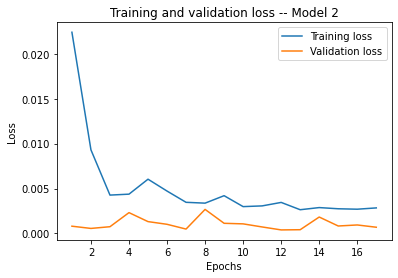

In [ ]:
# Plot loss, val_loss
loss = model_2_hist.history['loss']
val_loss = model_2_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

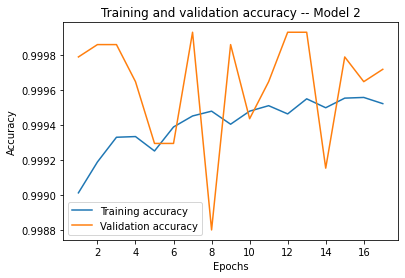

In [ ]:
# Plot accuracy, val_acc
acc = model_2_hist.history['accuracy']
val_acc = model_2_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

### Model 2: with batch_size = 16


In [ ]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
31866/31866 [==============================] - 79s 2ms/step - loss: 0.1086 - accuracy: 0.9664 - val_loss: 0.0381 - val_accuracy: 0.9956
Epoch 2/50
31866/31866 [==============================] - 79s 2ms/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.0208 - val_accuracy: 0.9975
Epoch 3/50
31866/31866 [==============================] - 80s 3ms/step - loss: 0.0164 - accuracy: 0.9958 - val_loss: 0.0128 - val_accuracy: 0.9992
Epoch 4/50
31866/31866 [==============================] - 81s 3ms/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.0264 - val_accuracy: 0.9961
Epoch 5/50
31866/31866 [==============================] - 79s 2ms/step - loss: 0.0140 - accuracy: 0.9968 - val_loss: 0.0155 - val_accuracy: 0.9984
Epoch 6/50
31866/31866 [==============================] - 80s 3ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0206 - val_accuracy: 0.9984
Epoch 7/50
31866/31866 [==============================] - 79s 2ms/step - loss: 0.0103 - accuracy: 0.9975 - val_loss: 0

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14163
       fraud       0.43      0.88      0.58        24

    accuracy                           1.00     14187
   macro avg       0.71      0.94      0.79     14187
weighted avg       1.00      1.00      1.00     14187



<function matplotlib.pyplot.imshow>

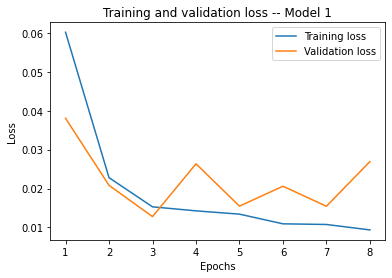

In [ ]:
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

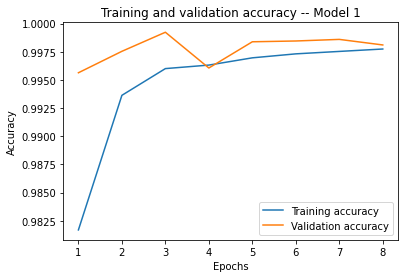

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

### Model 2: with batch_size = 32


In [ ]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
15933/15933 [==============================] - 40s 2ms/step - loss: 0.0991 - accuracy: 0.9710 - val_loss: 0.0083 - val_accuracy: 0.9980
Epoch 2/50
15933/15933 [==============================] - 40s 3ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0218 - val_accuracy: 0.9948
Epoch 3/50
15933/15933 [==============================] - 40s 3ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0125 - val_accuracy: 0.9973
Epoch 4/50
15933/15933 [==============================] - 40s 2ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.0144 - val_accuracy: 0.9973
Epoch 5/50
15933/15933 [==============================] - 39s 2ms/step - loss: 0.0076 - accuracy: 0.9977 - val_loss: 0.0136 - val_accuracy: 0.9975
Epoch 6/50
15933/15933 [==============================] - 39s 2ms/step - loss: 0.0068 - accuracy: 0.9980 - val_loss: 0.0118 - val_accuracy: 0.9971
Epoch 00006: early stopping


In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14163
       fraud       0.35      0.88      0.50        24

    accuracy                           1.00     14187
   macro avg       0.67      0.94      0.75     14187
weighted avg       1.00      1.00      1.00     14187



<function matplotlib.pyplot.imshow>

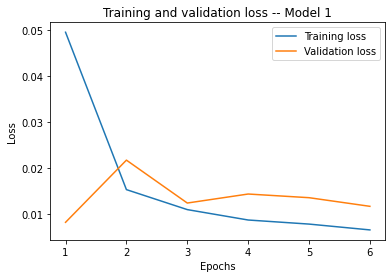

In [ ]:
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

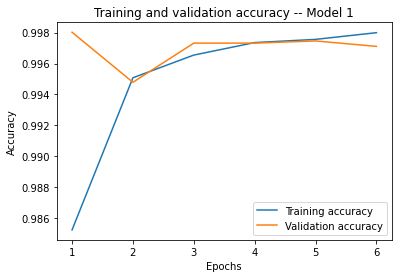

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

### Model 2: with batch_size = 64


In [ ]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=64,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
7967/7967 [==============================] - 23s 3ms/step - loss: 0.1087 - accuracy: 0.9665 - val_loss: 0.1499 - val_accuracy: 0.9629
Epoch 2/50
7967/7967 [==============================] - 22s 3ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0139 - val_accuracy: 0.9973
Epoch 3/50
7967/7967 [==============================] - 22s 3ms/step - loss: 0.0106 - accuracy: 0.9970 - val_loss: 0.0191 - val_accuracy: 0.9946
Epoch 4/50
7967/7967 [==============================] - 22s 3ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0096 - val_accuracy: 0.9984
Epoch 5/50
7967/7967 [==============================] - 22s 3ms/step - loss: 0.0068 - accuracy: 0.9979 - val_loss: 0.0091 - val_accuracy: 0.9992
Epoch 6/50
7967/7967 [==============================] - 22s 3ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.0105 - val_accuracy: 0.9983
Epoch 7/50
7967/7967 [==============================] - 23s 3ms/step - loss: 0.0059 - accuracy: 0.9983 - val_loss: 0.0129 - val_ac

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14163
       fraud       0.57      0.88      0.69        24

    accuracy                           1.00     14187
   macro avg       0.78      0.94      0.84     14187
weighted avg       1.00      1.00      1.00     14187



<function matplotlib.pyplot.imshow>

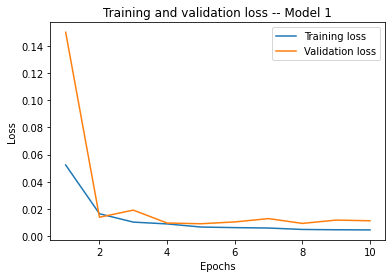

In [ ]:
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

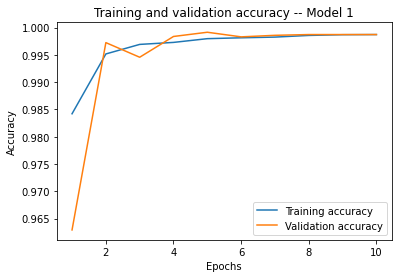

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

In [ ]:
val_acc

[0.9629212021827698,
 0.9972507953643799,
 0.994572103023529,
 0.9983786940574646,
 0.9991540908813477,
 0.9983081817626953,
 0.9985901713371277,
 0.9987311363220215,
 0.9987311363220215,
 0.9987311363220215]

### Model 2: with batch_size = 128


In [ ]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
3984/3984 [==============================] - 12s 3ms/step - loss: 0.1290 - accuracy: 0.9611 - val_loss: 0.0377 - val_accuracy: 0.9984
Epoch 2/50
3984/3984 [==============================] - 10s 3ms/step - loss: 0.0260 - accuracy: 0.9896 - val_loss: 0.0269 - val_accuracy: 0.9958
Epoch 3/50
3984/3984 [==============================] - 10s 3ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0191 - val_accuracy: 0.9963
Epoch 4/50
3984/3984 [==============================] - 10s 3ms/step - loss: 0.0107 - accuracy: 0.9968 - val_loss: 0.0089 - val_accuracy: 0.9987
Epoch 5/50
3984/3984 [==============================] - 10s 3ms/step - loss: 0.0087 - accuracy: 0.9971 - val_loss: 0.0134 - val_accuracy: 0.9970
Epoch 6/50
3984/3984 [==============================] - 10s 3ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.0121 - val_accuracy: 0.9977
Epoch 7/50
3984/3984 [==============================] - 10s 3ms/step - loss: 0.0049 - accuracy: 0.9984 - val_loss: 0.0138 - val_ac

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14163
       fraud       0.57      0.88      0.69        24

    accuracy                           1.00     14187
   macro avg       0.78      0.94      0.84     14187
weighted avg       1.00      1.00      1.00     14187



<function matplotlib.pyplot.imshow>

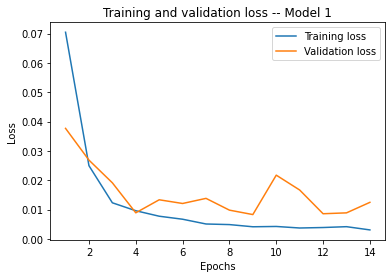

In [ ]:
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

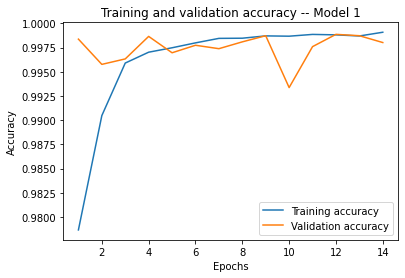

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

In [ ]:
acc

[0.9786683917045593,
 0.9904776811599731,
 0.99590665102005,
 0.9970285892486572,
 0.9974855780601501,
 0.9979915618896484,
 0.9984564185142517,
 0.9984740614891052,
 0.9987133741378784,
 0.9986819624900818,
 0.9988663196563721,
 0.9988192915916443,
 0.9987035393714905,
 0.9990899562835693]

In [ ]:
val_acc

[0.9983786940574646,
 0.9957704544067383,
 0.996334433555603,
 0.9986606240272522,
 0.9969688653945923,
 0.9977442622184753,
 0.9973918199539185,
 0.9980967044830322,
 0.9987311363220215,
 0.9933737516403198,
 0.9976032972335815,
 0.9988721013069153,
 0.9987311363220215,
 0.9980262517929077]

### Model 2: with batch_size = 256


In [ ]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=256,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
1992/1992 [==============================] - 6s 3ms/step - loss: 0.1501 - accuracy: 0.9572 - val_loss: 0.0172 - val_accuracy: 0.9968
Epoch 2/50
1992/1992 [==============================] - 5s 3ms/step - loss: 0.0221 - accuracy: 0.9935 - val_loss: 0.0226 - val_accuracy: 0.9978
Epoch 3/50
1992/1992 [==============================] - 5s 3ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0144 - val_accuracy: 0.9970
Epoch 4/50
1992/1992 [==============================] - 5s 3ms/step - loss: 0.0106 - accuracy: 0.9967 - val_loss: 0.0136 - val_accuracy: 0.9980
Epoch 5/50
1992/1992 [==============================] - 5s 3ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.0170 - val_accuracy: 0.9966
Epoch 6/50
1992/1992 [==============================] - 6s 3ms/step - loss: 0.0066 - accuracy: 0.9980 - val_loss: 0.0153 - val_accuracy: 0.9978
Epoch 7/50
1992/1992 [==============================] - 6s 3ms/step - loss: 0.0057 - accuracy: 0.9983 - val_loss: 0.0164 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14163
       fraud       0.66      0.88      0.75        24

    accuracy                           1.00     14187
   macro avg       0.83      0.94      0.87     14187
weighted avg       1.00      1.00      1.00     14187



<function matplotlib.pyplot.imshow>

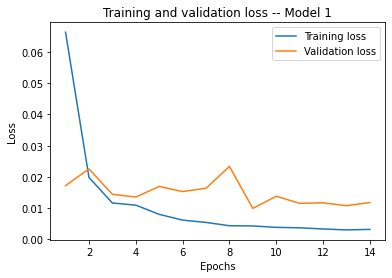

In [ ]:
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

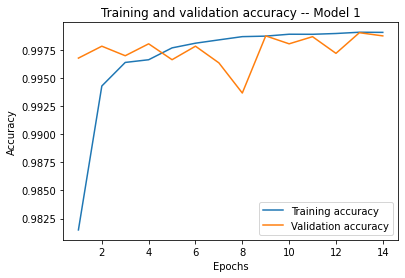

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

In [ ]:
acc

[0.9814985990524292,
 0.9942806959152222,
 0.9963734745979309,
 0.9966127276420593,
 0.9976660013198853,
 0.9980818033218384,
 0.9983760118484497,
 0.9986643195152283,
 0.9987094402313232,
 0.9988781213760376,
 0.9988722205162048,
 0.9989428520202637,
 0.9990546107292175,
 0.9990428686141968]

In [ ]:
val_acc

[0.9967573881149292,
 0.9978147745132446,
 0.9969688653945923,
 0.9980262517929077,
 0.9966163635253906,
 0.9978147745132446,
 0.996334433555603,
 0.9936557412147522,
 0.9987311363220215,
 0.9980262517929077,
 0.9986606240272522,
 0.9971803426742554,
 0.9990131258964539,
 0.9987311363220215]

### Model 2: with batch_size = 512


In [ ]:
# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu')) 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])

Epoch 1/50
996/996 [==============================] - 3s 3ms/step - loss: 0.1411 - accuracy: 0.9510 - val_loss: 0.0136 - val_accuracy: 0.9971
Epoch 2/50
996/996 [==============================] - 3s 3ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.0185 - val_accuracy: 0.9963
Epoch 3/50
996/996 [==============================] - 3s 3ms/step - loss: 0.0132 - accuracy: 0.9966 - val_loss: 0.0102 - val_accuracy: 0.9982
Epoch 4/50
996/996 [==============================] - 3s 3ms/step - loss: 0.0117 - accuracy: 0.9970 - val_loss: 0.0172 - val_accuracy: 0.9960
Epoch 5/50
996/996 [==============================] - 3s 3ms/step - loss: 0.0082 - accuracy: 0.9978 - val_loss: 0.0139 - val_accuracy: 0.9977
Epoch 6/50
996/996 [==============================] - 3s 3ms/step - loss: 0.0072 - accuracy: 0.9981 - val_loss: 0.0099 - val_accuracy: 0.9987
Epoch 7/50
996/996 [==============================] - 3s 3ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0126 - val_accuracy: 0.9980
Epoch 

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14163
       fraud       0.53      0.88      0.66        24

    accuracy                           1.00     14187
   macro avg       0.76      0.94      0.83     14187
weighted avg       1.00      1.00      1.00     14187



<function matplotlib.pyplot.imshow>

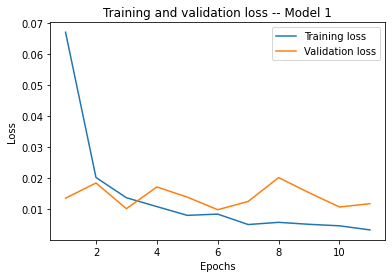

In [ ]:
# Plot loss, val_loss
loss = model_hist.history['loss']
val_loss = model_hist.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.imshow

<function matplotlib.pyplot.imshow>

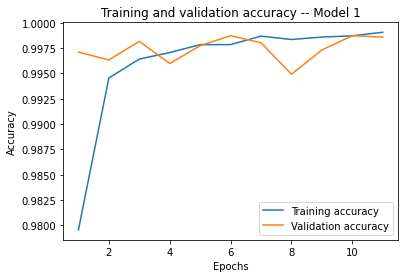

In [ ]:
# Plot accuracy, val_acc
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')

plt.title('Training and validation accuracy -- Model 2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.imshow

In [ ]:
acc

[0.9795549511909485,
 0.9945513606071472,
 0.996422529220581,
 0.9970638751983643,
 0.9978444576263428,
 0.997848391532898,
 0.998685896396637,
 0.9983505010604858,
 0.9985936880111694,
 0.998715341091156,
 0.9990683794021606]

In [ ]:
val_acc

[0.9971098303794861,
 0.996334433555603,
 0.9981672167778015,
 0.9959819316864014,
 0.9977442622184753,
 0.9987311363220215,
 0.9980262517929077,
 0.9949245452880859,
 0.9973213076591492,
 0.9987311363220215,
 0.9985901713371277]

### Model 4： 5 layers with dropout - 0.1&0.05


In [ ]:
from keras.layers import Dropout
from keras import models,layers

# Define the model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.05))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  


# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5) # Add early stopping


model_hist=model.fit(X_train,
                    y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(X_validation, y_validation),
                    callbacks=[es])


Epoch 1/50
3984/3984 [==============================] - 11s 3ms/step - loss: 0.1521 - accuracy: 0.9349 - val_loss: 0.0248 - val_accuracy: 0.9949
Epoch 2/50
3984/3984 [==============================] - 11s 3ms/step - loss: 0.0228 - accuracy: 0.9916 - val_loss: 0.0323 - val_accuracy: 0.9913
Epoch 3/50
3984/3984 [==============================] - 11s 3ms/step - loss: 0.0148 - accuracy: 0.9953 - val_loss: 0.0148 - val_accuracy: 0.9974
Epoch 4/50
3984/3984 [==============================] - 11s 3ms/step - loss: 0.0118 - accuracy: 0.9965 - val_loss: 0.0151 - val_accuracy: 0.9965
Epoch 5/50
3984/3984 [==============================] - 11s 3ms/step - loss: 0.0089 - accuracy: 0.9974 - val_loss: 0.0119 - val_accuracy: 0.9971
Epoch 6/50
3984/3984 [==============================] - 11s 3ms/step - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.0109 - val_accuracy: 0.9976
Epoch 7/50
3984/3984 [==============================] - 11s 3ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.0072 - val_ac

In [ ]:
from sklearn.metrics import classification_report
target_names = ['no fraud','fraud']
y_pred=model.predict(X_test).flatten()
y_pred=[1 if i>0.5 else 0 for i in y_pred]

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     14163
       fraud       0.70      0.88      0.78        24

    accuracy                           1.00     14187
   macro avg       0.85      0.94      0.89     14187
weighted avg       1.00      1.00      1.00     14187



In [ ]:
acc = model_hist.history['accuracy']
val_acc = model_hist.history['val_accuracy']

In [ ]:
acc

[0.9683968424797058,
 0.9929940700531006,
 0.9955791234970093,
 0.9966186285018921,
 0.9974482655525208,
 0.9975208640098572,
 0.9979386329650879,
 0.9980641603469849,
 0.9977915287017822,
 0.9983367919921875,
 0.9982230067253113,
 0.9985054731369019,
 0.9982799291610718,
 0.9984427094459534,
 0.9985662698745728,
 0.9987447261810303,
 0.9986721873283386,
 0.9986741542816162,
 0.9988878965377808,
 0.9988800883293152]

In [ ]:
val_acc

[0.9948540925979614,
 0.991258978843689,
 0.9973918199539185,
 0.9964753985404968,
 0.9971098303794861,
 0.9976032972335815,
 0.9985901713371277,
 0.996334433555603,
 0.9985901713371277,
 0.9988016486167908,
 0.9987311363220215,
 0.9990835785865784,
 0.9947130680084229,
 0.9976032972335815,
 0.9990835785865784,
 0.9990835785865784,
 0.9988016486167908,
 0.9991540908813477,
 0.9990131258964539,
 0.9992246031761169]

**f1-score for predicting 'fraud' is 0.76, which is worse than without dropout.**